## Análise Descritiva e Preprocessamento dos Dados

In [1]:
import pandas as pd
train = pd.read_csv(r'C:\Users\Helio\Documents\ALL THAT MATTERS\5 SEMESTRE - EESP\MACHINE LEARNING\Aula 2\titanic data\train.csv')
test = pd.read_csv(r'C:\Users\Helio\Documents\ALL THAT MATTERS\5 SEMESTRE - EESP\MACHINE LEARNING\Aula 2\titanic data\test.csv')

In [2]:
train.shape

(891, 12)

In [3]:
test.shape

(418, 11)

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

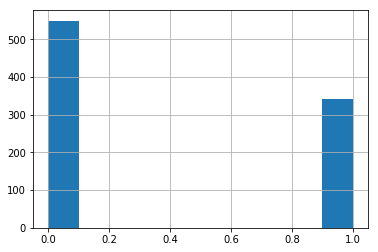

In [7]:
#Distribuição do Y
train.iloc[:,1].hist()

In [8]:
train.iloc[:,1].mean()

0.3838383838383838

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

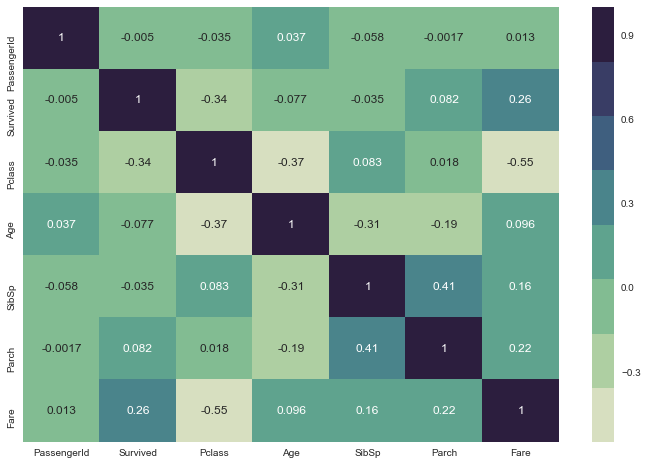

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap = sns.cubehelix_palette(8, start=.5, rot=-.75), annot=True)

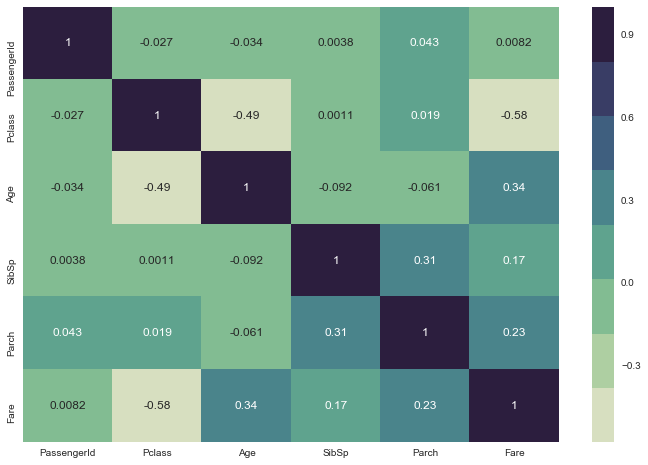

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(test.corr(), cmap = sns.cubehelix_palette(8, start=.5, rot=-.75), annot=True)

In [13]:
print('Passengers that survived vs passengers that passed away')
print(train['Survived'].value_counts())
print('\n')

Passengers that survived vs passengers that passed away
0    549
1    342
Name: Survived, dtype: int64




In [14]:
print('As proportions')
print(train['Survived'].value_counts(normalize = True))
print('\n')

As proportions
0    0.616162
1    0.383838
Name: Survived, dtype: float64




In [15]:
print('Males that survived vs males that passed away')
print(train['Survived'][train['Sex']=='male'].value_counts())
print('\n')

Males that survived vs males that passed away
0    468
1    109
Name: Survived, dtype: int64




In [16]:
print('Females that survived vs Females that passed away')
print(train['Survived'][train['Sex']=='female'].value_counts())
print('\n')

Females that survived vs Females that passed away
1    233
0     81
Name: Survived, dtype: int64




In [17]:
print('Normalized male survival')
print(train['Survived'][train['Sex']=='male'].value_counts(normalize = True))
print('\n')

Normalized male survival
0    0.811092
1    0.188908
Name: Survived, dtype: float64




In [18]:
print('Normalized female survival')
print(train['Survived'][train['Sex']=='female'].value_counts(normalize = True))

Normalized female survival
1    0.742038
0    0.257962
Name: Survived, dtype: float64


In [19]:
#fill NA values in Age with median
train["Age"] = train["Age"].fillna(train["Age"].median())

In [20]:
# Create the column Child and assign to 'NaN'
#child feature is interesting because children have priority to be saved
train["Child"] = float('NaN')

In [21]:
# Assign 1 to passengers under 14, 0 to those 14 or older. Print the new column.
train['Child'][train['Age'] < 14] = 1
train['Child'][train['Age'] >= 14] = 0

C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# Print normalized Survival Rates for passengers under 18
print(train["Survived"][train["Child"] == 1].value_counts(normalize = True))
print('\n')

1    0.591549
0    0.408451
Name: Survived, dtype: float64




In [23]:
# Print normalized Survival Rates for passengers 14 or older
print(train["Survived"][train["Child"] == 0].value_counts(normalize = True))

0    0.634146
1    0.365854
Name: Survived, dtype: float64


In [24]:
# Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train['Sex'] == 'female'] = 1

C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# Impute the Embarked variable
train["Embarked"] = train['Embarked'].fillna('S')

In [26]:
# Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
test.Fare[152] = test['Fare'].median()

C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## KNN E REG. LOG.

In [28]:
# Create the target and features numpy arrays: target, features_one
y = train['Survived'].values
x = train.drop(['Survived','Name','Ticket','Cabin'], axis=1).values

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x,y)
y_pred = knn.predict(x)
y_pred_prob = knn.predict_proba(x)

In [31]:
acc = 1 - ((y_pred - y)**2).mean()
acc

0.7059483726150393

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42, stratify=y)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [34]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[148  17]
 [ 79  24]]


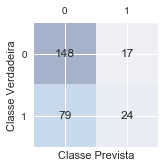

In [35]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')

plt.tight_layout()
plt.show()

In [36]:
print(knn.score(X_test, y_test))

0.6417910447761194


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.585
Recall: 0.233
F1: 0.333


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.65      0.90      0.76       165
          1       0.59      0.23      0.33       103

avg / total       0.63      0.64      0.59       268



In [39]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.62      0.99      0.76       165
          1       0.67      0.04      0.07       103

avg / total       0.64      0.62      0.50       268



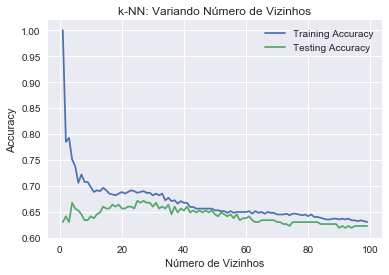

In [40]:
vizinhos = np.arange(1, 100)
train_accuracy = np.empty(len(vizinhos))
test_accuracy = np.empty(len(vizinhos))

for i, k in enumerate(vizinhos):
    knn = KNeighborsClassifier(n_neighbors = k)

    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Variando Número de Vizinhos')
plt.plot(vizinhos, train_accuracy, label = 'Training Accuracy')
plt.plot(vizinhos, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Número de Vizinhos')
plt.ylabel('Accuracy')
plt.show()

In [41]:
test_accuracy.argmax()

24

In [42]:
test_accuracy[test_accuracy.argmax()]

0.6716417910447762

In [43]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.pandas.DataFrame(x_scaled)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42, stratify=y)

C:\Users\Helio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


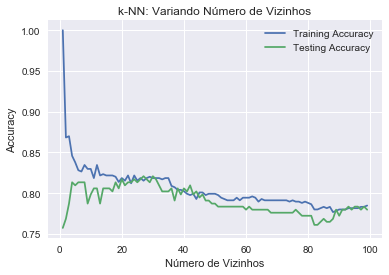

In [44]:
vizinhos = np.arange(1, 100)
train_accuracy = np.empty(len(vizinhos))
test_accuracy = np.empty(len(vizinhos))

for i, k in enumerate(vizinhos):
    knn = KNeighborsClassifier(n_neighbors = k)

    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Variando Número de Vizinhos')
plt.plot(vizinhos, train_accuracy, label = 'Training Accuracy')
plt.plot(vizinhos, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Número de Vizinhos')
plt.ylabel('Accuracy')
plt.show()

In [45]:
test_accuracy[test_accuracy.argmax()]

0.8208955223880597

In [46]:
test_accuracy.argmax()

26

In [47]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85       165
          1       0.79      0.70      0.74       103

avg / total       0.81      0.81      0.81       268



In [48]:
log_reg.score(X_train, y_train)

0.8154093097913323

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
cv_scores = cross_val_score(knn, x, y, cv=10)
cv_scores_scaled = cross_val_score(knn, x_scaled, y, cv=10)

print(cv_scores)
print(cv_scores_scaled)

print("Média dos Scores CV (K-NN): {}".format(np.mean(cv_scores)))
print("Média dos Scores CV (K-NN) com X transformado: {}".format(np.mean(cv_scores_scaled)))

[0.61111111 0.61111111 0.62921348 0.68539326 0.66292135 0.59550562
 0.60674157 0.65168539 0.64044944 0.61363636]
[0.81111111 0.77777778 0.7752809  0.83146067 0.79775281 0.7752809
 0.76404494 0.74157303 0.80898876 0.76136364]
Média dos Scores CV (K-NN): 0.6307768698218136
Média dos Scores CV (K-NN) com X transformado: 0.7844634547724436


In [51]:
cv_scores = cross_val_score(log_reg, x_scaled, y, cv=5)
print(cv_scores)
print("Média dos Scores CV (Reg. Logística): {}".format(np.mean(cv_scores)))

[0.80446927 0.82681564 0.78651685 0.7752809  0.82485876]
Média dos Scores CV (Reg. Logística): 0.8035882852144505


In [52]:
from sklearn.model_selection import cross_validate

In [53]:
cv_metrics = cross_validate(knn, x_scaled, y, cv=5, scoring=('precision', 'recall'))
cv_metrics

C:\Users\Helio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Helio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00200605, 0.00200796, 0.00100303, 0.00200582, 0.0010035 ]),
 'score_time': array([0.0200572 , 0.01904726, 0.01704407, 0.01905155, 0.01704359]),
 'test_precision': array([0.70689655, 0.74576271, 0.734375  , 0.74074074, 0.75      ]),
 'test_recall': array([0.5942029 , 0.63768116, 0.69117647, 0.58823529, 0.66176471]),
 'train_precision': array([0.75      , 0.74891775, 0.74698795, 0.74806202, 0.74015748]),
 'train_recall': array([0.61538462, 0.63369963, 0.67883212, 0.70437956, 0.68613139])}

In [54]:
print("Média das Precisions CV (K-NN): {}".format(np.mean(cv_metrics['test_precision'])))
print("Média das Recalls CV (K-NN): {}".format(np.mean(cv_metrics['test_recall'])))

Média das Precisions CV (K-NN): 0.735555000865857
Média das Recalls CV (K-NN): 0.6346121057118499


In [55]:
cv_metrics = cross_validate(log_reg, x_scaled, y, cv=5, scoring=('precision', 'recall'))
cv_metrics

C:\Users\Helio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Helio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00300574, 0.00200534, 0.00300813, 0.00200534, 0.00200534]),
 'score_time': array([0.00297451, 0.00200319, 0.00100279, 0.00200534, 0.00200534]),
 'test_precision': array([0.78333333, 0.796875  , 0.734375  , 0.75925926, 0.79365079]),
 'test_recall': array([0.68115942, 0.73913043, 0.69117647, 0.60294118, 0.73529412]),
 'train_precision': array([0.781893  , 0.77165354, 0.78455285, 0.78968254, 0.77083333]),
 'train_recall': array([0.6959707 , 0.71794872, 0.70437956, 0.72627737, 0.67518248])}

In [56]:
print("Média das Precisions CV (Reg. Logística): {}".format(np.mean(cv_metrics['test_precision'])))
print("Média das Recalls CV (Reg. Logística): {}".format(np.mean(cv_metrics['test_recall'])))

Média das Precisions CV (Reg. Logística): 0.7734986772486773
Média das Recalls CV (Reg. Logística): 0.6899403239556693


## Precision x Recall

In [57]:
from sklearn.metrics import average_precision_score
reglog = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42, stratify=y)
reglog.fit(X_train, y_train)
y_pred = reglog.predict(X_test)
average_precision = average_precision_score(y_test, y_pred)

print('Média de precision-recall: {0:0.2f}'.format(
      average_precision))

Média de precision-recall: 0.67


Text(0.5,1,'Trade-off entre Precision e Recall: AP=0.67')

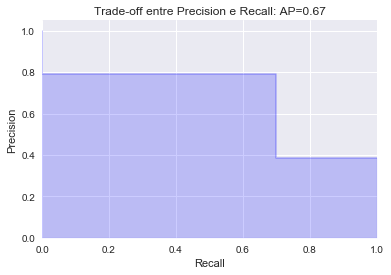

In [58]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Trade-off entre Precision e Recall: AP={0:0.2f}'.format(
          average_precision))

In [59]:
from sklearn.metrics import roc_curve, auc

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [61]:
roc_auc = auc(fpr, tpr)
roc_auc

0.7919388055310386

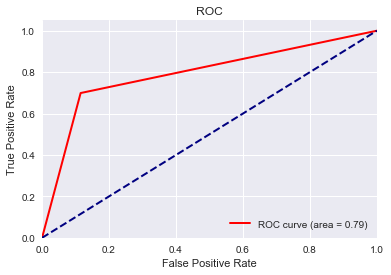

In [62]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [63]:
knn = KNeighborsClassifier(n_neighbors = 26)
knn.fit(X_test, y_test)
y_pred_knn = knn.predict_proba(X_test)[:,1]

In [64]:
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_knn)

In [65]:
roc_auc_knn = auc(fpr_knn, tpr_knn)

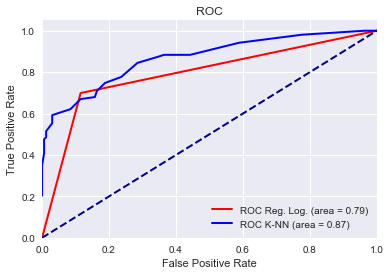

In [66]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC Reg. Log. (area = %0.2f)' % roc_auc)
plt.plot(fpr_knn, tpr_knn, color='blue',
         lw=lw, label='ROC K-NN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Changing Some Parameters

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42, stratify=y)
logreg1 = LogisticRegression()
logreg2 = LogisticRegression(penalty='l1')
logreg3 = LogisticRegression(penalty='l2')
logreg4 = LogisticRegression(C=1.5)
logreg_list = [logreg1, logreg2, logreg3, logreg4]

In [68]:
for model in logreg_list:
    model.fit(X_train,y_train)
    print(model)
    print(model.score(X_test, y_test))
    print('\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.8134328358208955


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.8134328358208955


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.8134328358208955


LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n

In [69]:
C_list = np.linspace(0.1,5,40)
fit_intercept_list = [True, False]
penalty_list = ['l1','l2']
multiclass_list = ['ovr', 'multinomial']
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
score_list = []

In [70]:
for c in C_list:
    for fit in fit_intercept_list:
        for penalty in penalty_list:
            for multiclass in multiclass_list:
                for solver in solver_list:
                    try:
                        model = LogisticRegression(C=c, fit_intercept=fit, penalty=penalty,
                                                   multi_class=multiclass, solver=solver)
                        model.fit(X_train,y_train)
                        score_list.append((model, model.score(X_test, y_test)))
                                          
                    except:
                        continue

In [71]:
scores = []
for i in range(len(score_list)):
    scores.append(score_list[i][1])

In [72]:
"Melhor accuracy para o modelo de Reg. Logística é {}".format(np.array(scores).max())

'Melhor accuracy para o modelo de Reg. Logística é 0.8171641791044776'

In [96]:
model_reglog = score_list[np.array(scores).argmax()][0]
model_reglog

LogisticRegression(C=0.7282051282051282, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [97]:
y_pred = model_reglog.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[147  18]
 [ 31  72]]


In [73]:
n_neighbors = range(1,50)
weights = ['uniform', 'distance']
algorithms = ['auto','ball_tree','kd_tree','brute']
p = range(2,10)

knn_score_list = []

In [74]:
for n in n_neighbors:
    for w in weights:
        for algo in algorithms:
            for value in p:
                model = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=algo, p=value)
                model.fit(X_train, y_train)
                knn_score_list.append((model, model.score(X_test, y_test)))

In [75]:
knn_scores = []
for i in range(len(knn_score_list)):
    knn_scores.append(knn_score_list[i][1])

In [76]:
"Melhor accuracy para o modelo de kNN é {}".format(np.array(knn_scores).max())

'Melhor accuracy para o modelo de kNN é 0.835820895522388'

In [94]:
model_knn = knn_score_list[np.array(knn_scores).argmax()][0]
model_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='distance')

In [95]:
y_pred = model_knn.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[152  13]
 [ 31  72]]


## Comparing with other models

### Decision Trees

In [78]:
from sklearn import tree

In [79]:
tree = tree.DecisionTreeClassifier()

In [80]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
tree.score(X_test, y_test)

0.7388059701492538

In [82]:
#tune parameters
from sklearn import tree

criterion = ['gini','entropy']
max_depth = range(10,50)
max_features = [int, float, 'auto', 'sqrt', 'log2', None]
presort = [True, False]

tree_list = []

for crit in criterion:
    for depth in max_depth:
        for feat in max_features:
            for boolean in presort:
                try:
                    model = tree.DecisionTreeClassifier(criterion=crit, max_depth=depth,
                                                        max_features=feat, presort=boolean)
                    model.fit(X_train, y_train)
                    tree_list.append((model,model.score(X_test, y_test)))
                except:
                    continue

In [83]:
tree_scores = []
for i in range(len(tree_list)):
    tree_scores.append(tree_list[i][1])

In [84]:
"Melhor accuracy para o modelo de Tree é {}".format(np.array(tree_scores).max())
#igual regressao logistica

'Melhor accuracy para o modelo de Tree é 0.8171641791044776'

In [98]:
tree_model = tree_list[np.array(tree_scores).argmax()][0]
tree_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [100]:
y_pred = tree_model.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[142  23]
 [ 26  77]]


### Random Forests

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
n_estimators = range(1,31)
max_features = [int, float, 'auto', 'sqrt', 'log2', None]
max_depth = range(10,31)
warm_start = [True, False]

forest_list = []

In [89]:
for estim in n_estimators:
    for feat in max_features:
        for depth in max_depth:
            for start in warm_start:
                try:
                    model = RandomForestClassifier(n_estimators=estim, max_features=feat,
                                                   max_depth=depth, warm_start=start)
                    model.fit(X_train, y_train)
                    forest_list.append((model,model.score(X_test, y_test)))
                except:
                    continue

In [90]:
forest_scores = []
for i in range(len(forest_list)):
    forest_scores.append(forest_list[i][1])

In [91]:
"Melhor accuracy para o modelo de Random Forest é {}".format(np.array(forest_scores).max())
#BEST UNTIL NOW!!!!

'Melhor accuracy para o modelo de Random Forest é 0.8470149253731343'

In [101]:
forest_model = forest_list[np.array(forest_scores).argmax()][0]
forest_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=23, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

In [102]:
y_pred = forest_model.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[149  16]
 [ 25  78]]
